# Radial Basis Function Networks
- Group: Alt

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
var = 0.1

I = np.identity(2)
cov = I*var

mean1 = np.array([0,1])
mean2 = np.array([1,0])
mean3 = np.array([0,0])
mean4 = np.array([1,1])

choice_y0 = np.random.uniform(low=0.0, high=1.0, size=60)
n1 = choice_y0[choice_y0 >= 0.5].shape[0]

x1 = np.random.multivariate_normal(mean1, cov, size=n1)
x2 = np.random.multivariate_normal(mean2, cov, size=60-n1)

choice_y1 = np.random.uniform(low=0.0, high=1.0, size=60)
n2 = choice_y0[choice_y1 >= 0.5].shape[0]

x3 = np.random.multivariate_normal(mean3, cov, size=n2)
x4 = np.random.multivariate_normal(mean4, cov, size=60-n2)

In [3]:
x_train = np.concatenate((x1,x2,x3,x4))
y_train = np.zeros(120)
y_train[60:] = 1

data_train = np.concatenate((x_train,np.array([y_train]).T),axis=1)

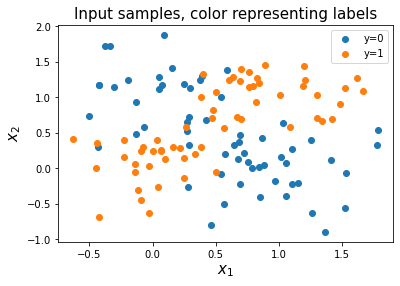

In [4]:
plt.scatter(x_train[y_train==0].T[0],x_train[y_train==0].T[1],label="y=0")
plt.scatter(x_train[y_train==1].T[0],x_train[y_train==1].T[1],label="y=1")
plt.xlabel("$x_1$",fontsize = 15)
plt.ylabel("$x_2$",fontsize = 15)
plt.title("Input samples, color representing labels",fontsize = 15)
plt.legend()
plt.show()

In [48]:
def euclidian(a,b):
    dist = np.sqrt(np.sum((a-b)**2,axis=1))
    return dist

def kNN(x,y,query,k):
    dist_query = euclidian(x,query)
    a = np.argsort(dist_query)
    b = np.argsort(a)
    knn = x[b][:k]
    y_knn = y[b][:k]
    #label_query = 1
    label_query = np.argmax(np.bincount(y_knn.astype(int)))
    #if np.mean(y_knn) < 0.5:
    #    label_query = 0
    return [label_query,knn]
    
    

In [ ]:
def kneighbors(X_test, return_distance=False):

    n_neighbors = 5
    dist = []
    neigh_ind = []

    point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test]

    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:n_neighbors]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)

    if return_distance:
        return np.array(dist), np.array(neigh_ind)

    return np.array(neigh_ind)

In [59]:
#creating the query points for the kNN

x1_min,x1_max = np.min(x_train.T[0]),np.max(x_train.T[0])
x2_min,x2_max = np.min(x_train.T[1]),np.max(x_train.T[1])

x1_lim_min = -x1_min* np.random.random_sample() + x1_min
x1_lim_max = x1_max* np.random.random_sample()

x2_lim_min = -x2_min* np.random.random_sample() + x2_min
x2_lim_max = x2_max* np.random.random_sample()

n_query = 100
x1_query = np.linspace(x1_lim_min-1, x1_lim_max+1, n_query)
x2_query = np.linspace(x2_lim_min-1, x2_lim_max+1, n_query)
x1v_query, x2v_query = np.meshgrid(x1_query, x2_query)
query_coord = np.c_[x1v_query.ravel(), x2v_query.ravel()]

array([1.56279803, 2.22189337])

In [70]:
x_train[0]
np.sqrt(np.sum((x_train[1]-query_coord[1])**2))

3.6159076304322215

In [66]:
x_train[1]

array([0.09141552, 1.88589547])

In [67]:
query_coord[1]

array([-1.56414386, -1.32874465])

In [65]:
euclidian(x_train[0:2],query_coord[1])

array([2.75567013, 3.61590763])

In [50]:
k = 5
labels_q = np.zeros(len(query_coord))
for i in range(len(query_coord)):
    labels_q[i] = kNN(x_train,y_train,query_coord[i],k)[0]


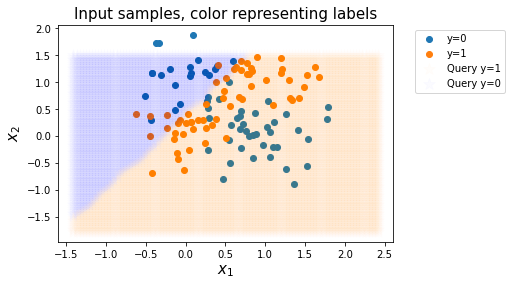

In [51]:
plt.scatter(x_train[y_train==0].T[0],x_train[y_train==0].T[1],label="y=0")
plt.scatter(x_train[y_train==1].T[0],x_train[y_train==1].T[1],label="y=1")
plt.scatter(query_coord[labels_q==1].T[0],query_coord[labels_q==1].T[1],marker='*',color='orange',label='Query y=1',alpha=0.01, s=150)
plt.scatter(query_coord[labels_q==0].T[0],query_coord[labels_q==0].T[1],marker='*',color='blue',label='Query y=0',alpha=0.01,s=150)
plt.xlabel("$x_1$",fontsize = 15)
plt.ylabel("$x_2$",fontsize = 15)
plt.title("Input samples, color representing labels",fontsize = 15)
plt.legend( bbox_to_anchor=(1.05, 1))
plt.show()

In [23]:
dist_query = euclidian(x_train,query_coord[-1])
dist_query
a = np.argsort(dist_query)

In [19]:
knn = x_train[b][:k]
knn

array([[-0.11177192, -0.3089539 ],
       [ 1.15274615, -0.19922375],
       [ 1.34259669,  0.67009598]])

In [14]:
b = np.argsort(a)

In [18]:
y_knn = y_train[b][:k]
y_knn

array([1., 0., 1.])

In [55]:
a = np.array([[3,4],[5,6]])
b = np.array([1.5,1])
np.sqrt(np.sum((a-b)**2,axis=1))

array([3.35410197, 6.10327781])

In [57]:
(a-b)**2

array([[ 2.25,  9.  ],
       [12.25, 25.  ]])